# Imports

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
import google.colab

# III. FRAMEWORK OVERVIEW AND DATA PREPROCESSING


**A. FRAMEWORK OVERVIEW (skipped)**

B. DATA COLLECTION AND DATASET

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
train_df = pd.read_csv("/content/drive/MyDrive/project/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/project/test.csv")

In [32]:
test_df

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,105.310967,1.262958,-0.703779,0.000081,-0.000951,0.017605,0.011208,0.011208,1.570800,1.262958,-0.703779,1016.073759,59.818117,615.914573,36.260015,90.239711,66.617057,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696,2,no stress
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,81.596693,-0.445806,-0.144911,0.000061,-0.001543,0.022969,0.011970,0.011970,1.918953,-0.445806,-0.144911,765.518473,32.452560,1566.866135,66.424024,98.336849,26.500086,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056,2,time pressure
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,187.269500,-0.666523,-0.103725,-0.000055,-0.002000,0.022079,0.009606,0.009606,2.298473,-0.666523,-0.103725,2237.739905,51.696218,2074.868884,47.933575,99.233584,16.024935,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943,2,no stress
3,824.838669,842.485905,117.822094,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,166.417439,-0.698096,-0.145092,0.000130,0.000445,0.014920,0.007051,0.007051,2.116033,-0.698096,-0.145092,2330.980957,81.661325,505.886664,17.722743,96.641348,17.581470,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355,2,no stress
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,203.382835,1.134111,0.769517,0.000310,-0.000170,0.019649,0.011689,0.011689,1.681034,1.134111,0.769517,4750.624447,89.465158,524.203971,9.871963,93.707747,35.199054,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098,2,interruption
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41028,1118.406543,1117.857050,113.955632,18.592177,18.592071,6.129225,54.234182,18.800000,0.266667,13.150967,160.620124,0.039637,-0.168160,0.000053,-0.000785,0.017038,0.005512,0.005512,3.091047,0.039637,-0.168160,4130.820437,80.985074,969.550262,19.008113,99.964170,0.347514,0.006813,0.035830,5100.718213,2789.962965,0.000358,2.183460,1.082927,2,time pressure
41029,855.991173,765.221410,296.763366,20.623727,20.610745,14.389415,76.416971,15.733333,3.533333,14.578861,419.433484,3.644498,1.866897,0.000736,0.000847,0.028135,0.016151,0.016151,1.742060,3.644498,1.866897,7163.989622,83.960222,1250.595884,14.656681,91.377081,118.014128,1.383097,8.622919,8532.599635,10.597001,0.094366,1.695327,1.154370,2,interruption
41030,689.388662,663.192770,133.815714,21.699038,21.696138,6.166896,90.254005,13.933333,4.000000,15.346606,188.620710,0.885293,0.689171,-0.000329,0.000709,0.032607,0.019102,0.019102,1.706976,0.885293,0.689171,3946.374071,64.968893,1911.676588,31.471804,89.839595,216.200973,3.559302,10.160405,6074.251632,8.842128,0.113095,2.078000,1.214869,2,no stress
41031,761.421571,761.064590,60.792671,11.280586,11.280573,5.389141,79.313782,2.733333,0.266667,7.979232,85.602742,0.005286,-0.040367,-0.000021,-0.000300,0.015049,0.008822,0.008822,1.705789,0.005286,-0.040367,732.516968,54.756129,563.466628,42.119504,93.094387,41.797177,3.124367,6.905613,1337.780773,13.480973,0.074179,2.191379,1.234546,2,no stress


                    MEAN_RR  MEDIAN_RR      SDRR     RMSSD      SDSD  \
MEAN_RR            1.000000   0.960858  0.462681  0.333090  0.332993   
MEDIAN_RR          0.960858   1.000000  0.333355  0.309163  0.309124   
SDRR               0.462681   0.333355  1.000000  0.262261  0.261937   
RMSSD              0.333090   0.309163  0.262261  1.000000  1.000000   
SDSD               0.332993   0.309124  0.261937  1.000000  1.000000   
SDRR_RMSSD         0.332578   0.203296  0.914891 -0.068263 -0.068637   
HR                -0.944644  -0.929620 -0.202389 -0.285130 -0.285122   
pNN25              0.286851   0.270765  0.135833  0.951826  0.951847   
pNN50              0.245344   0.197176  0.472639  0.794806  0.794734   
SD1                0.332993   0.309124  0.261937  1.000000  1.000000   
SD2                0.462376   0.333051  0.999997  0.260257  0.259932   
KURT              -0.292890  -0.284451 -0.095933 -0.178865 -0.178901   
SKEW              -0.197701  -0.317033  0.276902 -0.053912 -0.05

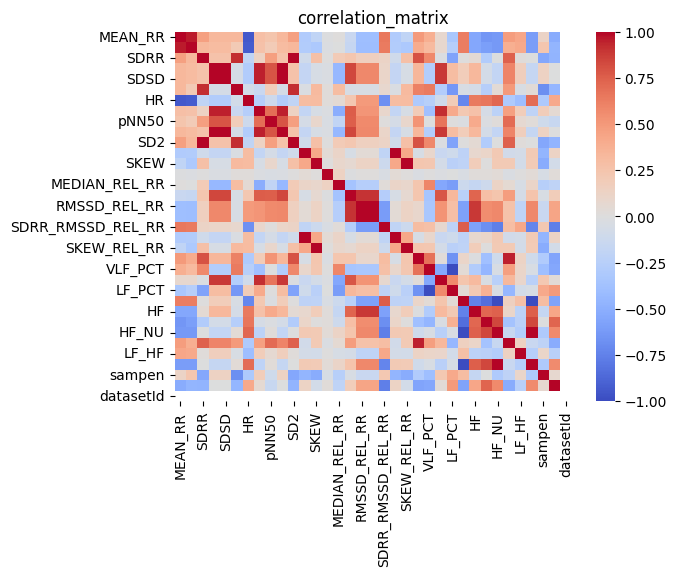

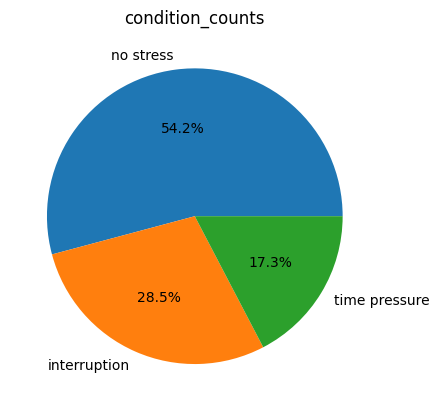

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,199.061782,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,114.634458,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,118.939253,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,127.318597,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,87.718281,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410317,1118.406543,1117.857050,113.955632,18.592177,18.592071,6.129225,54.234182,18.800000,0.266667,13.150967,160.620124,0.039637,-0.168160,0.000053,-0.000785,0.017038,0.005512,0.005512,3.091047,0.039637,-0.168160,4130.820437,80.985074,969.550262,19.008113,99.964170,0.347514,0.006813,0.035830,5100.718213,2789.962965,0.000358,2.183460,1.082927,2,time pressure
410318,855.991173,765.221410,296.763366,20.623727,20.610745,14.389415,76.416971,15.733333,3.533333,14.578861,419.433484,3.644498,1.866897,0.000736,0.000847,0.028135,0.016151,0.016151,1.742060,3.644498,1.866897,7163.989622,83.960222,1250.595884,14.656681,91.377081,118.014128,1.383097,8.622919,8532.599635,10.597001,0.094366,1.695327,1.154370,2,interruption
410319,689.388662,663.192770,133.815714,21.699038,21.696138,6.166896,90.254005,13.933333,4.000000,15.346606,188.620710,0.885293,0.689171,-0.000329,0.000709,0.032607,0.019102,0.019102,1.706976,0.885293,0.689171,3946.374071,64.968893,1911.676588,31.471804,89.839595,216.200973,3.559302,10.160405,6074.251632,8.842128,0.113095,2.078000,1.214869,2,no stress
410320,761.421571,761.064590,60.792671,11.280586,11.280573,5.389141,79.313782,2.733333,0.266667,7.979232,85.602742,0.005286,-0.040367,-0.000021,-0.000300,0.015049,0.008822,0.008822,1.705789,0.005286,-0.040367,732.516968,54.756129,563.466628,42.119504,93.094387,41.797177,3.124367,6.905613,1337.780773,13.480973,0.074179,2.191379,1.234546,2,no stress


In [33]:
# from @robertovicario
# https://www.kaggle.com/code/robertovicario/swell-kw-stress-detection#Analyze-Data

#train_df = pd.read_csv("/train.csv")
#test_df = pd.read_csv("/test.csv")
df = pd.concat([train_df, test_df], ignore_index=True)

def analyze_data(df):

    pd.set_option('display.max_columns', None)
    #print(df.describe(include='all'))

    numeric_data = df.select_dtypes(include=['number'])
    correlation_matrix = numeric_data.corr()
    print(correlation_matrix)
    sns.heatmap(correlation_matrix, cmap='coolwarm')
    plt.title('correlation_matrix')
    plt.show()

    condition_counts = df['condition'].value_counts()
    labels = condition_counts.index
    sizes = condition_counts.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title('condition_counts')
    plt.show()

analyze_data(df)
df

# C. DATA PREPROCESSING


Step 1. Initial Data Preprocessing.

The collected HRV data in the SWELL−KW dataset are time-variant. For classification, we re-construct the HRV data, which was a discrete time series with timestamps, to a series indexed with sequence numbers without timestamps.
Moreover, we convert all data into the numerical format.
We also remove participants’ noisy, incomplete, or missing data.
These processing steps result in 25 participant’s data with 410322 number of records and 34 number of features for stress level classification.

In [35]:
import joblib
# code to replicate Step 1
X = df.drop(columns=['datasetId', 'condition'])
y = df.condition
onehot_encoder = OneHotEncoder(sparse_output=False)
y = onehot_encoder.fit_transform(y.to_numpy().reshape(-1, 1))
joblib.dump(onehot_encoder, "encoder.pkl")

['encoder.pkl']

Step 2. Further data preprocessing steps are performed as follows.

Splitting data for training and testing as 80|20 for train|test datasets, respectively;
Normalization with a standard scalar method to confine the feature values within the range of {0,1}, as some of the selected features were in different magnitudes; and
Reshaping of each row of the training features into a 1D vector so that it becomes an input to the input layer of the deep learning model.

In [36]:
# code to replicate Step 2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#X_train = StandardScaler().fit_transform(X_train).reshape(-1, 1, 34)
#X_test = StandardScaler().fit_transform(X_test).reshape(-1, 1, 34)
#X_train.shape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train/test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit scaler ONLY on training data
scaler = StandardScaler()
scaler.fit(X_train_raw)

joblib.dump(scaler, "scaler.pkl")

# Transform both
X_train = scaler.transform(X_train_raw).reshape(-1, 1, 34)
X_test = scaler.transform(X_test_raw).reshape(-1, 1, 34)

# IV. A CNN MODEL FOR STRESS STATUS CLASSIFICATION

A. FEATURE RANKING AND EXTRACTION

---


Firstly, we rank the essential features based on their relevance to the classification task. To do so, the ANOVA [31] Ftest is adopted to select the significant features from the SWELL−KW dataset for feature ranking and extraction. ANOVA is a popular tool to perform a parametric statistical hypothesis test that assesses whether the means of two or more data samples (typically three or more) are from the same distribution or not. An F-statistic or F-test is a statistical test method that adopts ANOVA to calculate the ratio between variance values, such as variance from two different samples, or explained and unexplained variance. Furthermore, ANOVA can be used when one variable is numeric, and the other one is categorical, such as when a numerical input data and a classification outcome variable are compared in a classification task. In this study, we first employ all features for stress classification and then drop the minor significant features based on the importance of features (i.e., feature ranking) before performing the classification task. In the latter case, the training time is shortened while keeping the accuracy of the model.

B. A CNN DL MODEL FOR STRESS CLASSIFICATION

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Softmax

model = Sequential()

model.add(Conv1D(filters=64, kernel_size=2, activation='gelu', padding='same'))
model.add(Dense(units=16, activation='gelu'))
model.add(MaxPool1D(pool_size=1, strides=1))
model.add(Flatten())
model.add(Dense(units=3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training

In [38]:
history = model.fit(X_train,
                    y_train,
                    epochs=50,  # number of epochs
                    batch_size=64,  # batch size
                    validation_split=0.05)

Epoch 1/50
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8190 - loss: 0.4421 - val_accuracy: 0.9806 - val_loss: 0.0729
Epoch 2/50
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9852 - loss: 0.0555 - val_accuracy: 0.9938 - val_loss: 0.0252
Epoch 3/50
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9952 - loss: 0.0205 - val_accuracy: 0.9978 - val_loss: 0.0104
Epoch 4/50
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9967 - loss: 0.0127 - val_accuracy: 0.9974 - val_loss: 0.0086
Epoch 5/50
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9980 - loss: 0.0080 - val_accuracy: 0.9968 - val_loss: 0.0097
Epoch 6/50
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9983 - loss: 0.0062 - val_accuracy: 0.9996 - val_loss: 0.0022
Epoch 7/50
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9981 - loss: 0.0068 - val_accuracy: 0.9994 - val_loss: 0.0023
Epoch 8/50
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9989 - loss: 0

# Testing

In [39]:
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Assuming a multi-class classification problem
y_test_classes = np.argmax(y_test, axis=1)

2565/2565 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


Precision: 1.0
Recall: 1.0
Accuracy: 1.0
F1 Score: 1.0
Matthews Correlation Coefficient: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23362
           1       1.00      1.00      1.00     44597
           2       1.00      1.00      1.00     14106

    accuracy                           1.00     82065
   macro avg       1.00      1.00      1.00     82065
weighted avg       1.00      1.00      1.00     82065



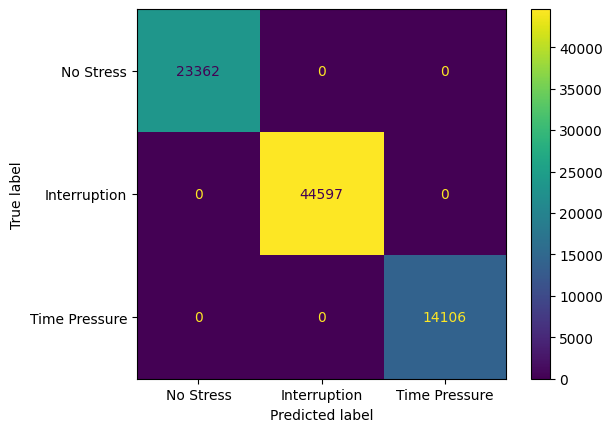

In [40]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, matthews_corrcoef, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Assuming you have true labels in y_test
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
mcc = matthews_corrcoef(y_test_classes, y_pred_classes)
report = classification_report(y_test_classes, y_pred_classes)
cm = confusion_matrix(y_test_classes, y_pred_classes)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print("Classification Report:\n", report)
disp = ConfusionMatrixDisplay(cm, display_labels=['No Stress', "Interruption", "Time Pressure"])
disp.plot()

In [41]:
import joblib
import os

# 📝 SET YOUR CUSTOM PATH HERE (must be a folder that exists!)
save_path = "/content/drive/MyDrive/Colab Notebooks/project/HRV model"

# Make sure the directory exists
os.makedirs(save_path, exist_ok=True)

# Save the Keras model
model.save(f"{save_path}/stress_model_up.keras")

# Save the StandardScaler
joblib.dump(scaler, f"{save_path}/scaler.pkl")

# Save the OneHotEncoder
joblib.dump(onehot_encoder, f"{save_path}/encoder.pkl")

print(f"✅ Model, scaler, and encoder saved to {save_path}")

✅ Model, scaler, and encoder saved to /content/drive/MyDrive/Colab Notebooks/project/HRV model


In [47]:
test_df

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,105.310967,1.262958,-0.703779,0.000081,-0.000951,0.017605,0.011208,0.011208,1.570800,1.262958,-0.703779,1016.073759,59.818117,615.914573,36.260015,90.239711,66.617057,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696,2,no stress
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,81.596693,-0.445806,-0.144911,0.000061,-0.001543,0.022969,0.011970,0.011970,1.918953,-0.445806,-0.144911,765.518473,32.452560,1566.866135,66.424024,98.336849,26.500086,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056,2,time pressure
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,187.269500,-0.666523,-0.103725,-0.000055,-0.002000,0.022079,0.009606,0.009606,2.298473,-0.666523,-0.103725,2237.739905,51.696218,2074.868884,47.933575,99.233584,16.024935,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943,2,no stress
3,824.838669,842.485905,117.822094,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,166.417439,-0.698096,-0.145092,0.000130,0.000445,0.014920,0.007051,0.007051,2.116033,-0.698096,-0.145092,2330.980957,81.661325,505.886664,17.722743,96.641348,17.581470,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355,2,no stress
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,203.382835,1.134111,0.769517,0.000310,-0.000170,0.019649,0.011689,0.011689,1.681034,1.134111,0.769517,4750.624447,89.465158,524.203971,9.871963,93.707747,35.199054,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098,2,interruption
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41028,1118.406543,1117.857050,113.955632,18.592177,18.592071,6.129225,54.234182,18.800000,0.266667,13.150967,160.620124,0.039637,-0.168160,0.000053,-0.000785,0.017038,0.005512,0.005512,3.091047,0.039637,-0.168160,4130.820437,80.985074,969.550262,19.008113,99.964170,0.347514,0.006813,0.035830,5100.718213,2789.962965,0.000358,2.183460,1.082927,2,time pressure
41029,855.991173,765.221410,296.763366,20.623727,20.610745,14.389415,76.416971,15.733333,3.533333,14.578861,419.433484,3.644498,1.866897,0.000736,0.000847,0.028135,0.016151,0.016151,1.742060,3.644498,1.866897,7163.989622,83.960222,1250.595884,14.656681,91.377081,118.014128,1.383097,8.622919,8532.599635,10.597001,0.094366,1.695327,1.154370,2,interruption
41030,689.388662,663.192770,133.815714,21.699038,21.696138,6.166896,90.254005,13.933333,4.000000,15.346606,188.620710,0.885293,0.689171,-0.000329,0.000709,0.032607,0.019102,0.019102,1.706976,0.885293,0.689171,3946.374071,64.968893,1911.676588,31.471804,89.839595,216.200973,3.559302,10.160405,6074.251632,8.842128,0.113095,2.078000,1.214869,2,no stress
41031,761.421571,761.064590,60.792671,11.280586,11.280573,5.389141,79.313782,2.733333,0.266667,7.979232,85.602742,0.005286,-0.040367,-0.000021,-0.000300,0.015049,0.008822,0.008822,1.705789,0.005286,-0.040367,732.516968,54.756129,563.466628,42.119504,93.094387,41.797177,3.124367,6.905613,1337.780773,13.480973,0.074179,2.191379,1.234546,2,no stress


In [56]:
import joblib
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model


model = load_model(f"{save_path}/stress_model_up.keras")
scaler = joblib.load(f"{save_path}/scaler.pkl")
encoder = joblib.load(f"{save_path}/encoder.pkl")

row = test_df.iloc[4]  # change index if you like

# Drop label/id columns to isolate features
features = row.drop(["datasetId", "condition"]).values.reshape(1, -1)

# STEP 4: Scale and reshape
scaled = scaler.transform(features).reshape(1, 1, 34)

# STEP 5: Predict
prediction = model.predict(scaled)
predicted_index = np.argmax(prediction)
predicted_label = encoder.categories_[0][predicted_index]

# STEP 6: Show result
print("Prediction probabilities:", prediction)
print("Predicted class:", predicted_label)
print("True class:", row['condition'])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Prediction probabilities: [[1.0000000e+00 1.7710384e-18 3.6559518e-37]]
Predicted class: interruption
True class: interruption


In [57]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 1, 64)          │         4,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1, 16)          │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 1, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,523 (64.55 KB)

 Trainable params: 5,507 (21.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,016 (43.04 KB)